In [209]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
# import tensorflow as tf
# from keras import models
# from keras import layers

# # sklearn
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [210]:
df = pd.read_csv('coffee_drinking_dataset_for_analysis.csv')
df.head()

,Timestamp,Name,Email,Do you drink at least one cup of coffee 4 times a week?,What time did you wake up this morning?,"What time did you drink your coffee?\n\n- A) On day 1 you need to drink coffee 20 minutes after waking up.\n\n- B) On day 2 you need to drink coffee 2 hours after waking up.\n\nIf you skipped this time interval, please don't submit the form.","How many hours has it been since you woke up?\n\nFor testing accuracy, please complete this survey 6 hours after waking up. \n\nIf you're filling it out earlier or later than 6 hours after waking up, that's okay—just be honest in your response 😉.",How awake do you feel right now? (scale 1-5),How difficult was it to focus on tasks today? (scale 1-5),How physically tired do you feel right now? (scale 1-5),How much coffee did you drink today?,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended)
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN
1,3/2/2025 9:33:20,amit bhattacharyya,aabtzu@berkeley.edu,Yes,8:00:00 AM,8:30:00 AM,1.56,5 = Fully alert (completely awake),4 = Easy (can focus with little effort),5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN
2,3/2/2025 13:26:32,Sai Sharath,Saisupriyasharath@gmail.com,Yes,7:15:00 AM,8:45:00 AM,3.00,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN
3,3/2/2025 15:11:43,Reetu Gupta,reetu.gupta@gmail.com,Yes,6:00:00 AM,6:10:00 AM,6.16,3 = Moderately awake (functioning but tired),3 = Somewhat difficult (can focus but get side...,3 = Somewhat tired (feel fatigue but can be ac...,NaN,NaN,NaN
4,3/2/2025 18:20:48,Raymond Lee,raymondleemids@berkeley.edu,Yes,9:15:00 AM,9:30:00 AM,6.00,5 = Fully alert (completely awake),"5 = Very easy (no distractions, fully productive)",5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN


In [211]:
df.columns

Index(['Timestamp', 'Name', 'Email',
       'Do you drink at least one cup of coffee 4 times a week?',
       'What time did you wake up this morning?',
       'What time did you drink your coffee?\n\n- A) On day 1 you need to drink coffee 20 minutes after waking up.\n\n- B) On day 2 you need to drink coffee 2 hours after waking up.\n\nIf you skipped this time interval, please don't submit the form.',
       'How many hours has it been since you woke up?\n\nFor testing accuracy, please complete this survey 6 hours after waking up. \n\nIf you're filling it out earlier or later than 6 hours after waking up, that's okay—just be honest in your response 😉. ',
       'How awake do you feel right now? (scale 1-5)',
       'How difficult was it to focus on tasks today?  (scale 1-5)',
       'How physically tired do you feel right now?   (scale 1-5)',
       'How much coffee did you drink today? ',
       'Did you notice any differences in your alertness today compared to yesterday? (Open-ended

In [212]:
cols = df.columns.tolist()

# Example new names for columns 5-12
cols[3:11]= ['criteria_ind', 'wake_up_ts', 'drink_coffee_ts', 'hrs_since_woke', 
             'awake_answer', 'difficult_answer', 'physical_answer', 'num_cups_today']

# Assign the new names to those specific columns
df.columns = cols
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended)
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN


In [213]:
# dont need these columns
df.drop(columns = ['Did you notice any differences in your alertness today compared to yesterday? (Open-ended) ',
'Any additional comments about your experience with drinking coffee at this time? (Open-ended) '], inplace =True)

In [363]:
# 3 users did not meet criteria
# total_user_count = pd.read_csv('coffee_drinking_dataset_for_analysis.csv')

# cols = total_user_count.columns.tolist()

# # Example new names for columns 5-12
# cols[3:11]= ['criteria_ind', 'wake_up_ts', 'drink_coffee_ts', 'hrs_since_woke', 
#              'awake_answer', 'difficult_answer', 'physical_answer', 'num_cups_today']

# # Assign the new names to those specific columns
# total_user_count.columns = cols
# total_user_count.groupby('Email')['criteria_ind'].value_counts()

Email                         criteria_ind
Aatifhshah@gmail.com          Yes             2
Amileiafarah@gmail.com        Yes             1
Armine.hakobyan@ymail.com     Yes             1
Brian.tran2@boeing.com        Yes             1
Derand237@gmail.com           Yes             2
IM332@CORNELL.EDU             Yes             1
LaferriereJC@gmail.com        Yes             1
Saisupriyasharath@gmail.com   Yes             1
Sean.huynh2@boeing.com        Yes             1
aabtzu@berkeley.edu           Yes             1
aanisah.q@gmail.com           Yes             2
affan98@gmail.com             Yes             2
akshaynair.phoenix@gmail.com  Yes             2
amanyalshibli@gmail.com       Yes             1
cosmoplasma@gmail.com         Yes             2
cp_a2000@yahoo.com            Yes             2
essam.rao@gmail.com           Yes             2
fjsuboh@gmail.com             No              1
horngcatherine@gmail.com      No              1
icysnow624@berkeley.edu       Yes            

In [214]:
df['criteria_ind'].value_counts()

criteria_ind
Yes    41
No      3
Name: count, dtype: int64

In [215]:
# 33 people actually participated overall
df['Email'].nunique()

33

In [216]:
# selecting only for participants that matched selection criteria
df = df[df['criteria_ind']=='Yes']

In [217]:
#looking at nulls
df.isna().sum()

Timestamp           0
Name                0
Email               0
criteria_ind        0
wake_up_ts          0
drink_coffee_ts     0
hrs_since_woke      0
awake_answer        0
difficult_answer    0
physical_answer     0
num_cups_today      6
dtype: int64

In [218]:
# checked that every Email has a name associated with it
df.groupby('Name')['Email'].count().sort_values(ascending=True)

Name
ISHTIAQUE M              1
Tony Ma                  1
Sean Huynh               1
Sai Sharath              1
Reetu Gupta              1
Raymond Lee              1
Rand Khasawneh           1
Rand                     1
Katrina                  1
Jujhar Bedi              1
Joshua Laferriere        1
Jonathan Sovan Nguyen    1
amit bhattacharyya       1
Farah Syed               1
nazik                    1
Amany Alshibli           1
Chris Tam                1
Cecille                  1
Cecille                  1
Brian T                  1
Armine                   1
Anni Yao                 1
Aatif                    1
Al                       1
Aatif Shah               1
Yusuke Sato              2
Sophia                   2
David Ye                 2
Akshay                   2
Essam Rao                2
Mohsin Haider            2
Affan Hussain            2
Aanisah Quddoos          2
Name: Email, dtype: int64

In [219]:
# dropping extra rows
# dropping on 'Email' column is better because some people put not their whole name each day they participated in the experiment
df = df.dropna(subset=['Email'])
df.isna().sum()


Timestamp           0
Name                0
Email               0
criteria_ind        0
wake_up_ts          0
drink_coffee_ts     0
hrs_since_woke      0
awake_answer        0
difficult_answer    0
physical_answer     0
num_cups_today      6
dtype: int64

In [220]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today'],
      dtype='object')

In [221]:
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN


In [222]:
df.dtypes

Timestamp            object
Name                 object
Email                object
criteria_ind         object
wake_up_ts           object
drink_coffee_ts      object
hrs_since_woke      float64
awake_answer         object
difficult_answer     object
physical_answer      object
num_cups_today       object
dtype: object

In [223]:
df['wake_up_ts'] = pd.to_datetime(df['wake_up_ts'])
df['drink_coffee_ts'] = pd.to_datetime(df['drink_coffee_ts'])

In [224]:
# 30 participants met the selection criteria
df['Email'].nunique()

30

In [365]:
len(df)

41

In [225]:
# 11 people did 2 days of the experiment
(df.groupby('Email')['Timestamp'].count()>1).value_counts()

Timestamp
False    19
True     11
Name: count, dtype: int64

In [227]:
df = df.sort_values(by=['Email', 'Timestamp'])
df['day_order'] = df.groupby('Email').cumcount() + 1
df.head()

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order
23,4/10/2025 17:01:34,Aatif Shah,Aatifhshah@gmail.com,Yes,2025-04-20 07:30:00,2025-04-20 07:52:00,6.5,5 = Fully alert (completely awake),"5 = Not difficult at all (no distractions, ful...","4 = Slightly tired (little fatigue, feel mostl...",2 cups,1
33,4/11/2025 19:32:38,Aatif,Aatifhshah@gmail.com,Yes,2025-04-20 08:30:00,2025-04-20 10:28:00,8.0,"2 = Very sleepy (eyes tired, slow moving)",3 = Somewhat difficult (can focus but get side...,"2 = Very tired (sluggish, little energy)",1 cup,2
29,4/11/2025 17:05:22,Farah Syed,Amileiafarah@gmail.com,Yes,2025-04-20 08:00:00,2025-04-20 08:30:00,6.0,4 = Mostly awake (can focus on most tasks),4 = Slightly difficult (can focus with little ...,"4 = Slightly tired (little fatigue, feel mostl...",1 cup,1
13,3/19/2025 12:37:23,Armine,Armine.hakobyan@ymail.com,Yes,2025-04-20 06:00:00,2025-04-20 06:10:00,9.5,4 = Mostly awake (can focus on most tasks),3 = Somewhat difficult (can focus but get side...,"4 = Slightly tired (little fatigue, feel mostl...",2 cups,1
17,3/21/2025 16:22:26,Brian T,Brian.tran2@boeing.com,Yes,2025-04-20 07:20:00,2025-04-20 09:20:00,6.0,4 = Mostly awake (can focus on most tasks),3 = Somewhat difficult (can focus but get side...,"4 = Slightly tired (little fatigue, feel mostl...",2 cups,1


In [228]:
df['time_diff'] = (df['drink_coffee_ts'] - df['wake_up_ts']).abs()

# checking who complied properly
def check_coffee_compliance(row):
    if row['day_order'] == 1:
        # Control day: should drink coffee within 30 minutes
        return 1 if row['time_diff'] <= pd.Timedelta(minutes=30) else 0
    elif row['day_order'] == 2:
        # Treatment day: should drink coffee between 1 and 3 hours
        return 1 if pd.Timedelta(hours=1) <= row['time_diff'] <= pd.Timedelta(hours=3) else 0
    else:
        return 0  # default

df['coffee_compliant'] = df.apply(check_coffee_compliance, axis=1)

In [233]:
# creating column to identify people that participated both days
df['two_day_participate'] = (
    df.groupby('Email')['day_order']
      .transform(lambda x: 1 if set(x) == {1, 2} else 0)
)
df.head(3)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order,time_diff,coffee_compliant,two_day_participate
23,4/10/2025 17:01:34,Aatif Shah,Aatifhshah@gmail.com,Yes,2025-04-20 07:30:00,2025-04-20 07:52:00,6.5,5 = Fully alert (completely awake),"5 = Not difficult at all (no distractions, ful...","4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 00:22:00,1,1
33,4/11/2025 19:32:38,Aatif,Aatifhshah@gmail.com,Yes,2025-04-20 08:30:00,2025-04-20 10:28:00,8.0,"2 = Very sleepy (eyes tired, slow moving)",3 = Somewhat difficult (can focus but get side...,"2 = Very tired (sluggish, little energy)",1 cup,2,0 days 01:58:00,1,1
29,4/11/2025 17:05:22,Farah Syed,Amileiafarah@gmail.com,Yes,2025-04-20 08:00:00,2025-04-20 08:30:00,6.0,4 = Mostly awake (can focus on most tasks),4 = Slightly difficult (can focus with little ...,"4 = Slightly tired (little fatigue, feel mostl...",1 cup,1,0 days 00:30:00,1,0


In [235]:
df.head(3)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order,time_diff,coffee_compliant,two_day_participate
23,4/10/2025 17:01:34,Aatif Shah,Aatifhshah@gmail.com,Yes,2025-04-20 07:30:00,2025-04-20 07:52:00,6.5,5 = Fully alert (completely awake),"5 = Not difficult at all (no distractions, ful...","4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 00:22:00,1,1
33,4/11/2025 19:32:38,Aatif,Aatifhshah@gmail.com,Yes,2025-04-20 08:30:00,2025-04-20 10:28:00,8.0,"2 = Very sleepy (eyes tired, slow moving)",3 = Somewhat difficult (can focus but get side...,"2 = Very tired (sluggish, little energy)",1 cup,2,0 days 01:58:00,1,1
29,4/11/2025 17:05:22,Farah Syed,Amileiafarah@gmail.com,Yes,2025-04-20 08:00:00,2025-04-20 08:30:00,6.0,4 = Mostly awake (can focus on most tasks),4 = Slightly difficult (can focus with little ...,"4 = Slightly tired (little fatigue, feel mostl...",1 cup,1,0 days 00:30:00,1,0


In [ ]:
df[(df['two_day_participate']==0)]

41

In [244]:
# for those that only participated one day, 8 satisfied control conditions, 11 satisfied treatment
print(df[(df['two_day_participate']==0) & (df['time_diff']>=pd.Timedelta(hours=1)) & (df['time_diff']<=pd.Timedelta(hours=3))]['Email'].count())
print(df[(df['two_day_participate']==0) & (df['time_diff']<=pd.Timedelta(minutes=30))]['Email'].count())

8
11


In [ ]:
# alert index score analysis

In [245]:
df['awake_score'] = df['awake_answer'].str.extract('(\d+)')
df['difficult_score'] = df['difficult_answer'].str.extract('(\d+)')
df['physical_score'] = df['physical_answer'].str.extract('(\d+)')
df.head(2)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order,time_diff,coffee_compliant,two_day_participate,awake_score,difficult_score,physical_score
23,4/10/2025 17:01:34,Aatif Shah,Aatifhshah@gmail.com,Yes,2025-04-20 07:30:00,2025-04-20 07:52:00,6.5,5 = Fully alert (completely awake),"5 = Not difficult at all (no distractions, ful...","4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 00:22:00,1,1,5,5,4
33,4/11/2025 19:32:38,Aatif,Aatifhshah@gmail.com,Yes,2025-04-20 08:30:00,2025-04-20 10:28:00,8.0,"2 = Very sleepy (eyes tired, slow moving)",3 = Somewhat difficult (can focus but get side...,"2 = Very tired (sluggish, little energy)",1 cup,2,0 days 01:58:00,1,1,2,3,2


In [246]:
df['awake_score'] = pd.to_numeric(df['awake_score'], errors='coerce')
df['difficult_score'] = pd.to_numeric(df['difficult_score'], errors='coerce')
df['physical_score'] = pd.to_numeric(df['physical_score'], errors='coerce')


In [247]:
df['alert_index_score'] = df['awake_score'] + df['difficult_score'] + df['physical_score']
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order,time_diff,coffee_compliant,two_day_participate,awake_score,difficult_score,physical_score,alert_index_score
23,4/10/2025 17:01:34,Aatif Shah,Aatifhshah@gmail.com,Yes,2025-04-20 07:30:00,2025-04-20 07:52:00,6.5,5 = Fully alert (completely awake),"5 = Not difficult at all (no distractions, ful...","4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 00:22:00,1,1,5,5,4,14


In [248]:
df['alert_index_score'] = pd.to_numeric(df['alert_index_score'], errors='coerce')

4-20-25: Re-running the below code based on realization that there are more people who participated on both days!

In [ ]:
# Between subjects copmarison analysis (n = 19)

In [250]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today', 'day_order', 'time_diff',
       'coffee_compliant', 'two_day_participate', 'awake_score',
       'difficult_score', 'physical_score', 'alert_index_score'],
      dtype='object')

In [364]:
between_subjects_df['Email'].nunique()

19

In [251]:
# only selectin people that participated in only one day
between_subjects_df = df[df['two_day_participate'] == 0]

#assign control and treatment based on actual behavior
def assign_behavior(row):
    if row['time_diff'] <= pd.Timedelta(minutes=30):
        return 0  # control behavior
    elif pd.Timedelta(hours=1) <= row['time_diff'] < pd.Timedelta(hours=3):
        return 1  # treatment behavior
    else:
        return None  # neither group

# Apply the function
between_subjects_df['behavior_group'] = between_subjects_df.apply(assign_behavior, axis=1)

In [368]:
between_subjects_df['behavior_group'].value_counts()

behavior_group
0    11
1     8
Name: count, dtype: int64

In [252]:
between_subjects_df.head(3)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,day_order,time_diff,coffee_compliant,two_day_participate,awake_score,difficult_score,physical_score,alert_index_score,behavior_group
29,4/11/2025 17:05:22,Farah Syed,Amileiafarah@gmail.com,Yes,2025-04-20 08:00:00,2025-04-20 08:30:00,6.0,4 = Mostly awake (can focus on most tasks),4 = Slightly difficult (can focus with little ...,"4 = Slightly tired (little fatigue, feel mostl...",1 cup,1,0 days 00:30:00,1,0,4,4,4,12,0
13,3/19/2025 12:37:23,Armine,Armine.hakobyan@ymail.com,Yes,2025-04-20 06:00:00,2025-04-20 06:10:00,9.5,4 = Mostly awake (can focus on most tasks),3 = Somewhat difficult (can focus but get side...,"4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 00:10:00,1,0,4,3,4,11,0
17,3/21/2025 16:22:26,Brian T,Brian.tran2@boeing.com,Yes,2025-04-20 07:20:00,2025-04-20 09:20:00,6.0,4 = Mostly awake (can focus on most tasks),3 = Somewhat difficult (can focus but get side...,"4 = Slightly tired (little fatigue, feel mostl...",2 cups,1,0 days 02:00:00,0,0,4,3,4,11,1


In [253]:
# no nulls
between_subjects_df['behavior_group'].value_counts()

behavior_group
0    11
1     8
Name: count, dtype: int64

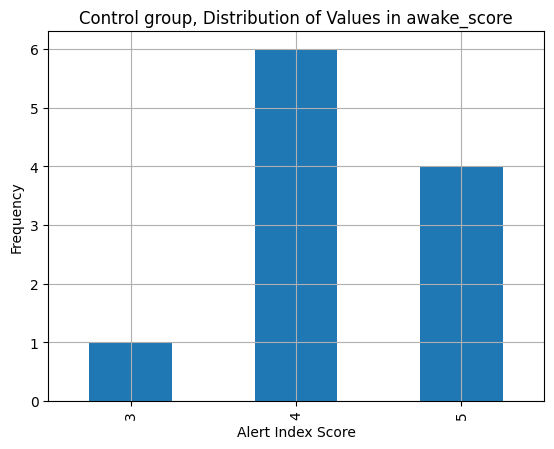

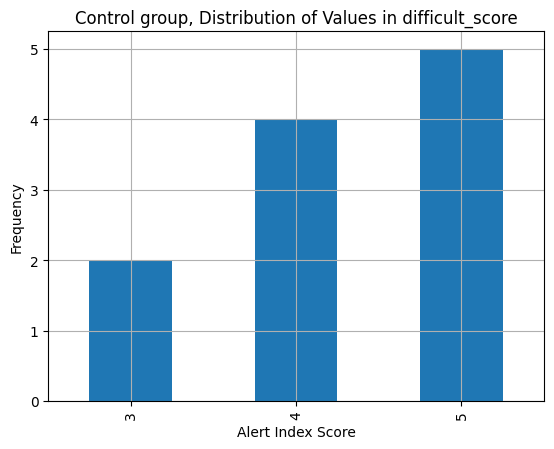

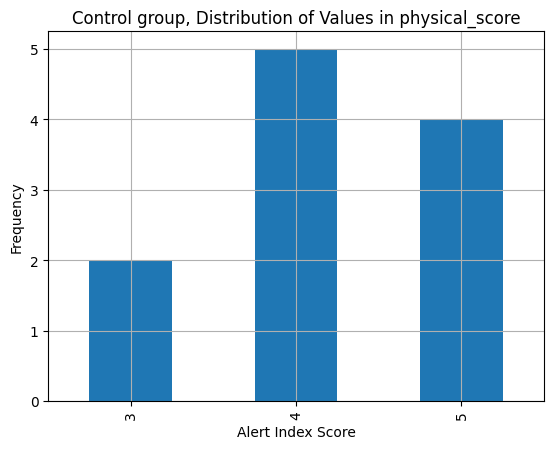

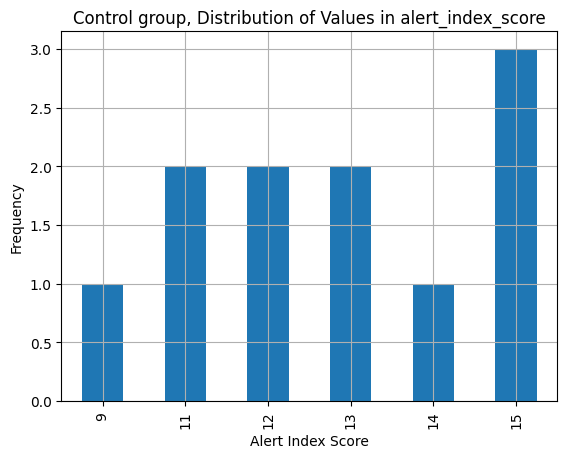

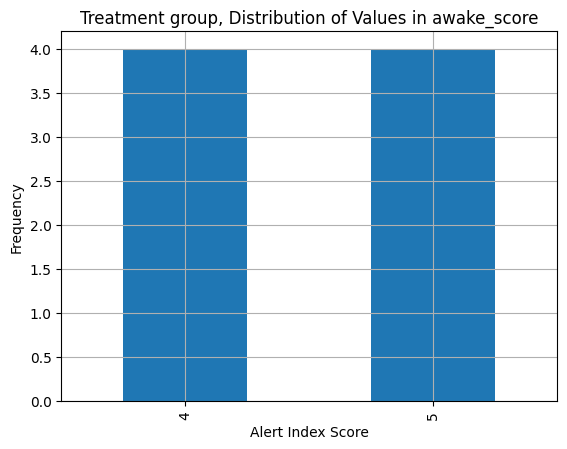

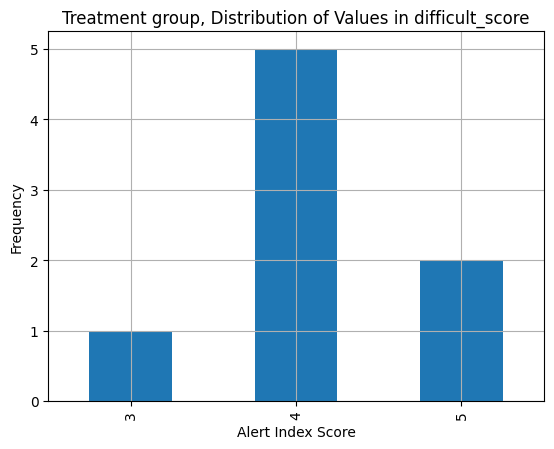

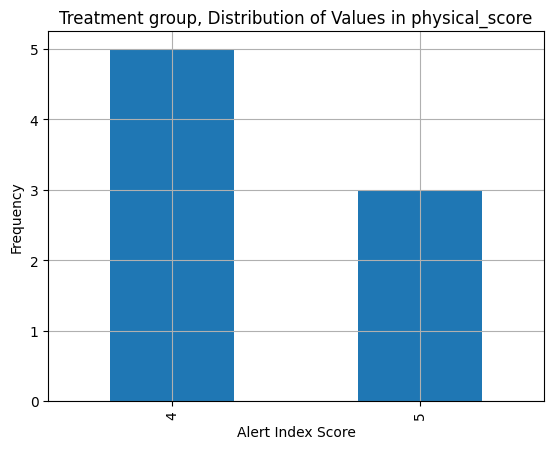

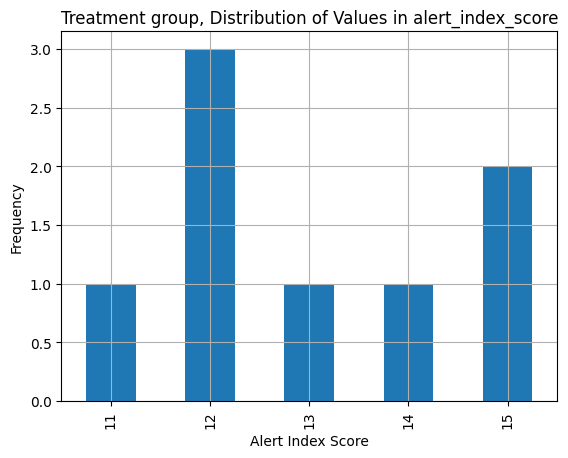

In [258]:
# visualizing distributions
for group in [0,1]:
    for metric in ['awake_score','difficult_score','physical_score','alert_index_score']:

        between_subjects_df[between_subjects_df['behavior_group']==group][metric].value_counts().sort_index().plot(kind='bar')

        # Add labels and title
        plt.xlabel('Alert Index Score')
        plt.ylabel('Frequency')
        if group == 0:
            plt.title('Control group, Distribution of Values in '+str(metric))
        else:
            plt.title('Treatment group, Distribution of Values in '+str(metric))
        plt.grid()
        # Show the plot
        plt.show()

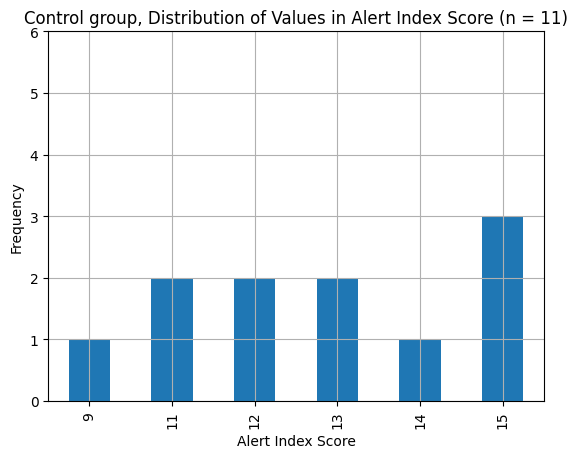

In [259]:
between_subjects_df[between_subjects_df['behavior_group']==0]['alert_index_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Alert Index Score')
plt.ylabel('Frequency')
plt.title('Control group, Distribution of Values in Alert Index Score (n = '+str(len(between_subjects_df[between_subjects_df['behavior_group']==0]))+')')
plt.ylim(0,6)
plt.grid()

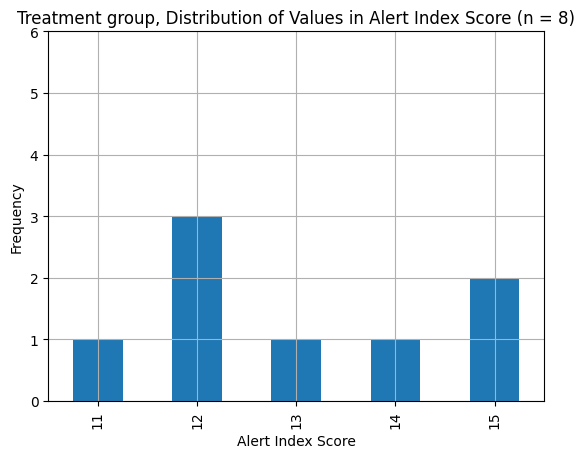

In [261]:
between_subjects_df[between_subjects_df['behavior_group']==1]['alert_index_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Alert Index Score')
plt.ylabel('Frequency')
plt.title('Treatment group, Distribution of Values in Alert Index Score (n = '+str(len(between_subjects_df[between_subjects_df['behavior_group']==1]))+')')
plt.ylim(0,6)
plt.grid()

In [322]:
a = between_subjects_df[between_subjects_df['behavior_group']==0]['alert_index_score'].mean()
b = between_subjects_df[between_subjects_df['behavior_group']==1]['alert_index_score'].mean()
print(a)
print(b)
print(b-a)

12.727272727272727
13.0
0.2727272727272734


In [323]:
from scipy.stats import ttest_ind
control_scores = between_subjects_df[between_subjects_df['behavior_group'] == 0]['alert_index_score']
treatment_scores = between_subjects_df[between_subjects_df['behavior_group'] == 1]['alert_index_score']

t_stat, p_val = ttest_ind(treatment_scores, control_scores, equal_var=False)
print(f"t = {t_stat:.2f}, p = {p_val:.3f}")

t = 0.34, p = 0.736


In [327]:
# Calculate t-test with unequal variances (Welch’s t-test)
t_stat, p_val = ttest_ind(treatment_scores, control_scores,equal_var=False)

# Degrees of freedom calculation manually (using formula for Welch's t-test)
n1 = len(treatment_scores)
n2 = len(control_scores)
s1 = treatment_scores.var(ddof=1)
s2 = control_scores.var(ddof=1)
dof = (s1/n1 + s2/n2) ** 2 / (( (s1/n1) ** 2 / (n1-1)) + ((s2/n2) ** 2 / (n2-1)))

# Calculate mean difference and standard error
mean_diff = treatment_scores.mean() - control_scores.mean()
se = np.sqrt(
    treatment_scores.var(ddof=1) / len(treatment_scores) +
    control_scores.var(ddof=1) / len(control_scores)
)

# 95% Confidence Interval
ci_low = mean_diff - stats.t.ppf(0.975, dof) * se
ci_high = mean_diff + stats.t.ppf(0.975, dof) * se

print(f"t = {t_stat:.2f}, p = {p_val:.3f}")
print(f"Mean difference (ATE): {mean_diff:.3f}")
print(f"95% Confidence Interval: [{ci_low:.3f}, {ci_high:.3f}]")

t = 0.34, p = 0.736
Mean difference (ATE): 0.273
95% Confidence Interval: [-1.406, 1.952]


In [262]:
control = between_subjects_df[between_subjects_df['behavior_group'] == 0]['alert_index_score']
treatment = between_subjects_df[between_subjects_df['behavior_group'] == 1]['alert_index_score']

# Calculate pooled standard deviation
pooled_std = np.sqrt(((control.std() ** 2) + (treatment.std() ** 2)) / 2)

# Calculate Cohen's d
cohen_d = (treatment.mean() - control.mean()) / pooled_std
print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: 0.16


Control ATE = 12.7, Treatment ATE = 13.0, Treatment effect = 0.27, p-value not significant (0.74),Cohen's d = 0.16. Need at least 390 participants for 80% power. 95% CI: [-1.4, 2.0]

In [ ]:
# Within subjects (paired differences) ITT analysis (n=11)
# Looking at subjects that participated both days and their scores on day 1 and 2, regardless of if they complied or not

In [263]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today', 'day_order', 'time_diff',
       'coffee_compliant', 'two_day_participate', 'awake_score',
       'difficult_score', 'physical_score', 'alert_index_score'],
      dtype='object')

In [ ]:
# creating dataframe for within subject comparison
within_subjects_df = df[df['two_day_participate'] == 1]
within_subjects_df[within_subjects_df['two_day_participate'] == 1]['Email'].nunique()

11

In [270]:
within_subjects_df = df[df['two_day_participate'] == 1]

pivoted = within_subjects_df.pivot(index='Email', columns='day_order', values='alert_index_score')
pivoted.columns = ['control_score', 'treatment_score']
pivoted = pivoted.dropna()

from scipy.stats import ttest_rel
ttest_rel(pivoted['treatment_score'], pivoted['control_score'])

TtestResult(statistic=-0.3417430630867044, pvalue=0.7396171010263004, df=10)

In [285]:
from scipy import stats
# 95% Confidence Interval
mean = pivoted['diff'].mean()
sem = stats.sem(pivoted['diff'])
ci = stats.t.interval(0.95, len(pivoted['diff'])-1, loc=mean, scale=sem)
print(f"95% CI for ATE: ({ci[0]:.3f}, {ci[1]:.3f})")

95% CI for ATE: (-2.735, 2.007)


In [276]:
pivoted.reset_index(inplace=True)
pivoted

,index,Email,control_score,treatment_score
0,0,Aatifhshah@gmail.com,14,7
1,1,Derand237@gmail.com,9,10
2,2,aanisah.q@gmail.com,10,11
3,3,affan98@gmail.com,14,14
4,4,akshaynair.phoenix@gmail.com,12,13
5,5,cosmoplasma@gmail.com,11,11
6,6,cp_a2000@yahoo.com,12,9
7,7,essam.rao@gmail.com,12,14
8,8,mohsin@mohsinhaider.com,8,11
9,9,soph.ameen@gmail.com,9,13


In [281]:
pivoted['diff'] = pivoted['treatment_score'] - pivoted['control_score']
ate = pivoted['diff'].mean()
print(pivoted['control_score'].mean())
print(pivoted['treatment_score'].mean())
print(f"ATE (within-subjects): {ate:.3f}")

11.181818181818182
10.818181818181818
ATE (within-subjects): -0.364


In [279]:
control = within_subjects_df[within_subjects_df['day_order'] == 1]['alert_index_score']
treatment = within_subjects_df[within_subjects_df['day_order'] == 2]['alert_index_score']

# Calculate pooled standard deviation
pooled_std = np.sqrt(((control.std() ** 2) + (treatment.std() ** 2)) / 2)

# Calculate Cohen's d
cohen_d = (treatment.mean() - control.mean()) / pooled_std
print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: -0.15


Control ATE = 11.1, Treatment ATE = 10.8, Treatment effect = -0.37, p-value not significant (0.74),Cohen's d = -0.15. Need at least 390-400 participants for 80% power. 95% CI for ATE: (-2.735, 2.007)

In [ ]:
# CACE analysis
# Looking at subjects that actually complied with the study for both days

In [310]:
compliers_df = within_subjects_df[
    (within_subjects_df['two_day_participate'] == 1) &
    (within_subjects_df['coffee_compliant'] == 1)
]

pivoted_cace = compliers_df.pivot(index='Email', columns='day_order', values='alert_index_score')
pivoted_cace.columns = ['control_day', 'treatment_day']

In [311]:
# need to drop those that were not compliant - 8 out of 11 were compliant both days
pivoted_cace.reset_index(inplace=True)
pivoted_cace = pivoted_cace.dropna()
print(len(pivoted_cace))
pivoted_cace

8


,Email,control_day,treatment_day
0,Aatifhshah@gmail.com,14.0,7.0
1,Derand237@gmail.com,9.0,10.0
3,affan98@gmail.com,14.0,14.0
4,akshaynair.phoenix@gmail.com,12.0,13.0
5,cosmoplasma@gmail.com,11.0,11.0
7,essam.rao@gmail.com,12.0,14.0
8,mohsin@mohsinhaider.com,8.0,11.0
10,yezhengrong1992@gmail.com,12.0,6.0


In [367]:
pivoted_cace['diff'] = pivoted_cace['treatment_day'] - pivoted_cace['control_day']
ate_cace = pivoted_cace['diff'].mean()
print(f"CACE ATE (Treatment - Control among compliers): {ate_cace:.3f}")

CACE ATE (Treatment - Control among compliers): -0.750


In [313]:
print(ttest_rel(pivoted_cace['treatment_day'], pivoted_cace['control_day']))

# 95% Confidence Interval
mean = pivoted_cace['diff'].mean()
sem = stats.sem(pivoted_cace['diff'])
ci = stats.t.interval(0.95, len(pivoted_cace['diff'])-1, loc=mean, scale=sem)
print(f"95% CI for ATE: ({ci[0]:.3f}, {ci[1]:.3f})")

TtestResult(statistic=-0.5743195381816405, pvalue=0.5837274624442594, df=7)
95% CI for ATE: (-3.838, 2.338)


In [366]:
print(pivoted_cace['treatment_day'].mean())
print(pivoted_cace['control_day'].mean())

10.75
11.5


In [329]:
control = pivoted_cace['treatment_day']
treatment = pivoted_cace['control_day']

# Calculate pooled standard deviation
pooled_std = np.sqrt(((control.std() ** 2) + (treatment.std() ** 2)) / 2)

# Calculate Cohen's d
cohen_d = (treatment.mean() - control.mean()) / pooled_std
print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: 0.29


Control ATE = 11.5, Treatment ATE = 10.8, Treatment effect = -0.75, p-value not significant (0.58),Cohen's d = 0.29. Need at least 375 participants for 80% power. 95% CI for ATE: (-3.838, 2.338)

In [ ]:
# Regression analysis

In [330]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today', 'day_order', 'time_diff',
       'coffee_compliant', 'two_day_participate', 'awake_score',
       'difficult_score', 'physical_score', 'alert_index_score'],
      dtype='object')

In [331]:
# between subjects regression

In [347]:
between_subjects_df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today', 'day_order', 'time_diff',
       'coffee_compliant', 'two_day_participate', 'awake_score',
       'difficult_score', 'physical_score', 'alert_index_score',
       'behavior_group', 'num_cups_today_regression'],
      dtype='object')

In [348]:
between_subjects_df['behavior_group'].value_counts()

behavior_group
0    11
1     8
Name: count, dtype: int64

In [354]:
#  2. Clean the 'num_cups_today' column to extract the number
between_subjects_df['num_cups_today_clean'] = (
    between_subjects_df['num_cups_today']
    .str.extract(r'(\d+)')    # Extract numeric part
    .astype(float)            # Convert to float to handle NaNs
)

# 3. Create dummy variables (categorical predictor)
# Reference category will be 1 cup
cups_dummies = pd.get_dummies(
    between_subjects_df['num_cups_today_clean'],
    prefix='num_cups',
    drop_first=True
)

# 4. Combine predictors into a design matrix
X = pd.concat([
    between_subjects_df[['hrs_since_woke', 'behavior_group']],  # Numeric predictors
    cups_dummies                                            # Dummy variables
], axis=1)

# Convert all bool columns in X to int
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})

# Add constant for intercept
X = sm.add_constant(X)

# 5. Define the dependent variable
y = between_subjects_df['alert_index_score']

# 6. Fit the regression model
model = sm.OLS(y, X, missing='drop').fit()

# 7. View results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      alert_index_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.902
Time:                        22:03:12   Log-Likelihood:                -36.307
No. Observations:                  19   AIC:                             82.61
Df Residuals:                      14   BIC:                             87.34
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.5381      1.301     10.

In [139]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 393.8 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 261.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\fquad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
